In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16,12)

In [2]:
import sys ; sys.path += ['../']

from Pycode.Data_Aquisition import get_crypto_data
from Pycode.Features_Engineering import *
from Pycode.train_XGB import *

**TABLE OF CONTENT**
* [Data Pipeline](#data-bullet)
* [XGBoost](#xgb_run-bullet)

## Data Pipeline<a class="anchor" id="data-bullet"></a>

- EUR/BTC Prices from 1590886800 to 1598086800 
- EUR/BTC Prices from 1583686800 to 1590886800 
- EUR/BTC Prices from 1576486800 to 1583686800 
- EUR/BTC Prices from 1569286800 to 1576486800 
- EUR/BTC Prices from 1562086800 to 1569286800 
- EUR/BTC Prices from 1554886800 to 1562086800 
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11999 entries, 2019-04-10 09:00:00 to 2020-08-22 09:00:00
Data columns (total 6 columns):
close         11999 non-null float64
high          11999 non-null float64
low           11999 non-null float64
open          11999 non-null float64
volumefrom    11999 non-null float64
volumeto      11999 non-null float64
dtypes: float64(6)
memory usage: 656.2 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11999 entries, 2019-04-10 09:00:00 to 2020-08-22 09:00:00
Data columns (total 6 columns):
close         11999 non-null float64
high          11999 non-null float64
low           11999 non-null float64
open          11999 non-null float64
volumefrom    

../Pycode/Features_Engineering.py:66: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  feats_df[col + '.M{}{}H'.format(l, i)] = series.rolling("{}H".format(i)).apply(stat)
../Pycode/Features_Engineering.py:67: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  feats_df[col + '.M{}{}H.diff'.format(l, i)] = series.rolling("{}H".format(i)).apply(stat).diff()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11999 entries, 2019-04-10 09:00:00 to 2020-08-22 09:00:00
Columns: 858 entries, volumefrom to volumeto_mov24H.MSum24H.diff
dtypes: float64(858)
memory usage: 78.6 MB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11999 entries, 2019-04-10 09:00:00 to 2020-08-22 09:00:00
Columns: 1716 entries, volumefrom to volumeto_mov24H.MSum24H.diff.Squared
dtypes: float64(1716)
memory usage: 157.2 MB
BTC Price.PSARs_0.02_0.2                 6227
BTC Price.SUPERTs_7_3.0                  6129
BTC Price.SUPERTl_7_3.0                  5876
BTC Price.PSARl_0.02_0.2                 5774
BTC Price.ISB_26                           77
BTC Price.EOM_14_100000000                 70
BTC Price.KSTs_9                           52
BTC Price.ISA_9                            51
BTC Price.KST_10_15_20_30_10_10_10_15      44
BTC Price.TRIXs_30_9                       38
BTC Price.MASSI_9_25                       32
BTC Price.TRIX_30_9                     

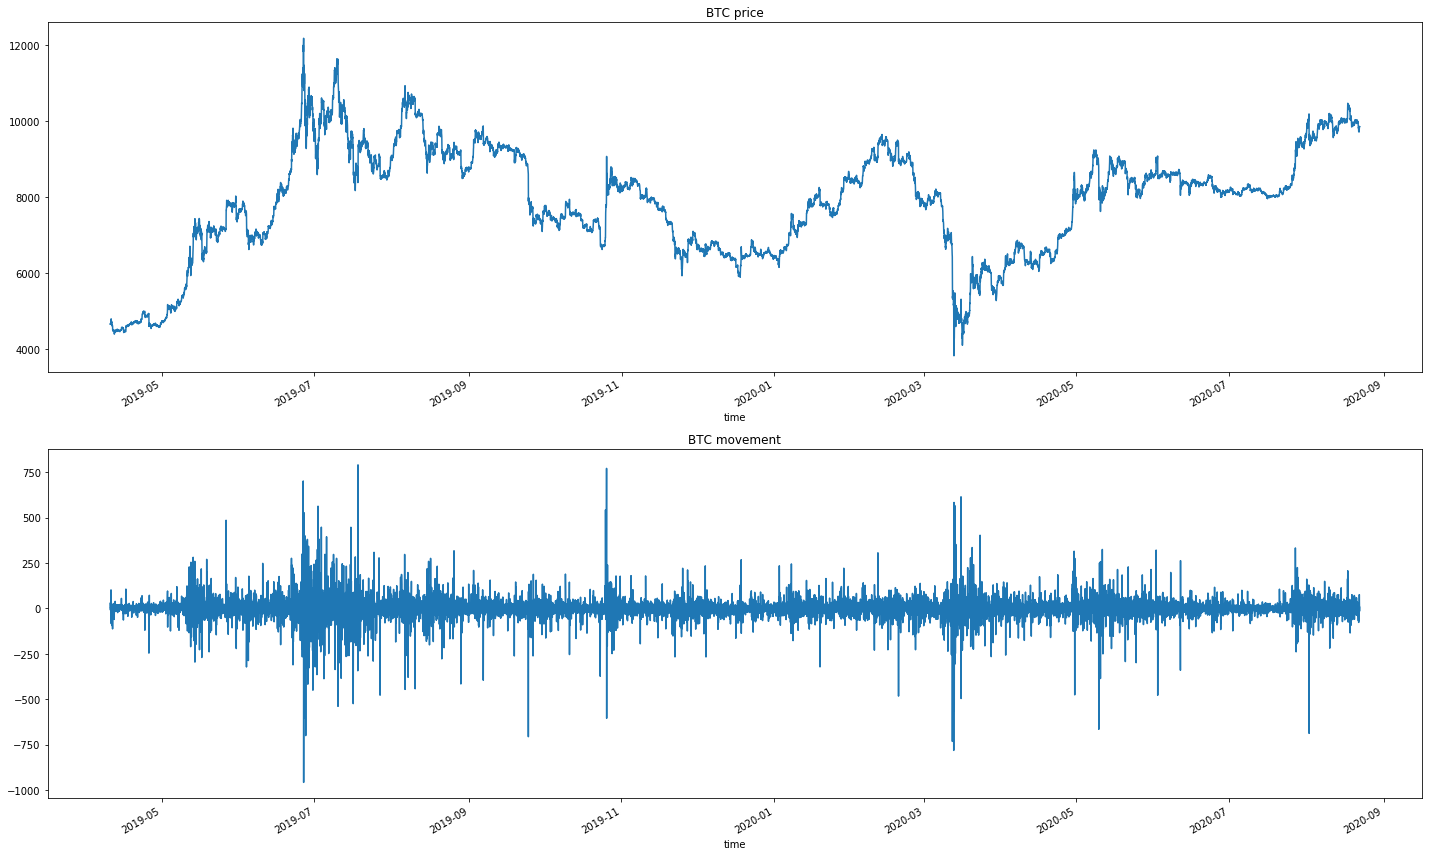

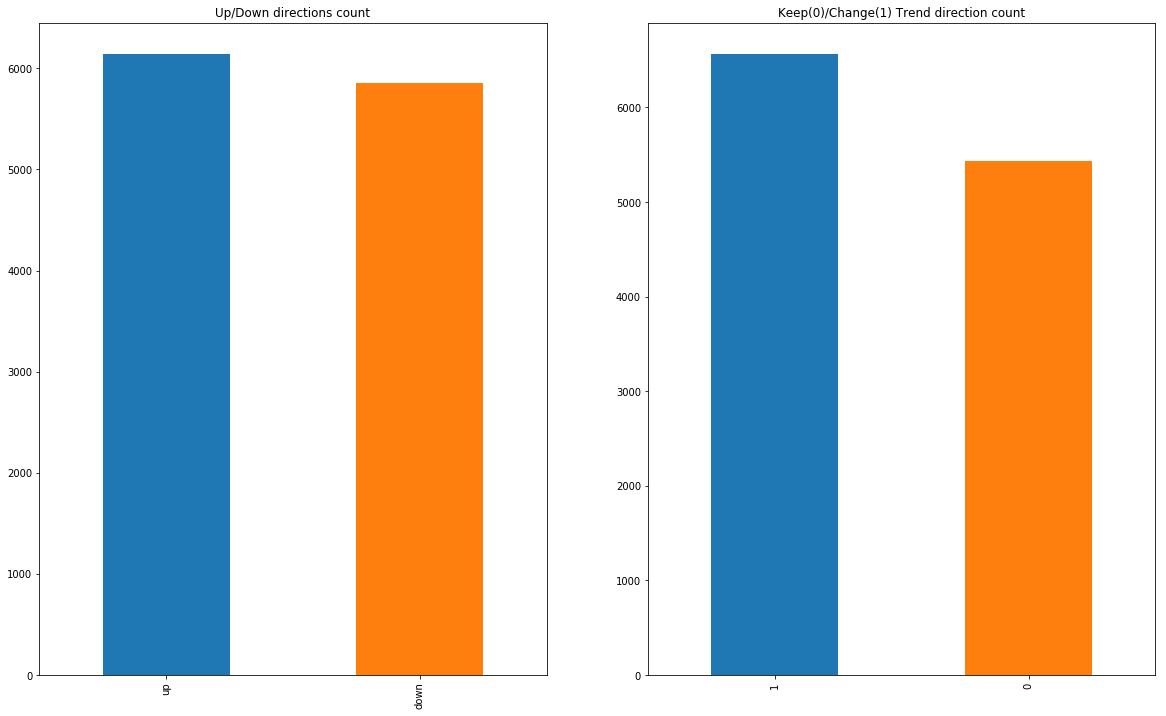

time
2019-04-10 10:00:00    1
2019-04-10 11:00:00    1
2019-04-10 12:00:00    0
2019-04-10 13:00:00    0
2019-04-10 14:00:00    1
2019-04-10 15:00:00    1
2019-04-10 16:00:00    1
2019-04-10 17:00:00    1
2019-04-10 18:00:00    0
2019-04-10 19:00:00    1
2019-04-10 20:00:00    0
2019-04-10 21:00:00    0
2019-04-10 22:00:00    1
2019-04-10 23:00:00    0
2019-04-11 00:00:00    1
2019-04-11 01:00:00    0
2019-04-11 02:00:00    1
2019-04-11 03:00:00    1
2019-04-11 04:00:00    1
2019-04-11 05:00:00    1
2019-04-11 06:00:00    0
2019-04-11 07:00:00    0
2019-04-11 08:00:00    0
2019-04-11 09:00:00    0
2019-04-11 10:00:00    1
2019-04-11 11:00:00    1
2019-04-11 12:00:00    0
2019-04-11 13:00:00    0
2019-04-11 14:00:00    1
2019-04-11 15:00:00    1
                      ..
2020-08-21 04:00:00    0
2020-08-21 05:00:00    1
2020-08-21 06:00:00    0
2020-08-21 07:00:00    1
2020-08-21 08:00:00    0
2020-08-21 09:00:00    1
2020-08-21 10:00:00    0
2020-08-21 11:00:00    0
2020-08-21 12:00:00 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass k=400 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11920 entries, 2019-04-12 14:00:00 to 2020-08-21 07:00:00
Columns: 400 entries, volumefrom to BTC Price.VWAP.Mov
dtypes: object(400)
memory usage: 36.5+ MB
- 0 NaNs in the dataset (features & target)
(11920, 400) (11920,)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11920 entries, 2019-04-12 14:00:00 to 2020-08-21 07:00:00
Columns: 400 entries, volumefrom to BTC Price.VWAP.Mov
dtypes: object(400)
memory usage: 36.5+ MB
None
(11920, 400) (11860, 400) (60, 400)


In [3]:
# Params
n_batch_obs=4
currency = 'EUR'
exchange = 'Coinbase'
n_best = 400
n_val=60

# Get data from API
df = get_crypto_data(n_batch_obs=n_batch_obs,  currency=currency, exchange=exchange)

# Create the features dataset
feats_df = features_engineering(df)

# Create the target series
target, class_weights = target_engineering(df)

# Select Kbest features
kbest_selector, kbest_df = features_selection(feats_df, target, n_best)



# Prepare the data for XGB Trainng
df_train_scaled, df_val_scaled, target_train, target_val = XGB_Data_Preparation(kbest_df, target, n_val=n_val)



## Run the XGB pipeline<a class="anchor" id="xgb_run-bullet"></a>
### Open to Close Trading Signal

In [4]:
# params
n_test = 200
n_tune = 100 # number of combinations to try during tuning


# Tuning for Close-Close Trading Signal
tuning_df = XGB_Tuning_Pipeline(df_train_scaled, df_val_scaled, target_train, target_val,
                                n_test=n_test, n_tune=n_tune)

# Get best params
best_params = tuning_df.iloc[0, 0]
print('Best parameters: {}'.format(best_params))

# Validation of the tuned model
df_backtest = XGB_Eval_Pipeline(best_params, 
                                df, target_name, df_train, df_val, target_train, target_val, 
                                n_test=n_test, _plot=True)


df_backtest

* 1/100: (0.1763, 0.8, 0.8)
Multiple eval metrics have been passed: 'test-ng_loss' will be used for early stopping.

Will train until test-ng_loss hasn't improved in 200 rounds.
Stopping. Best iteration:
[0]	train-ng_loss:0	test-ng_loss:0



ValueError: continuous format is not supported